In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import datetime
import seaborn as sns

# Day 13. Task 01
# Бинарный классификатор. Логистическая регрессия

## 0. Импорты

In [3]:
df = pd.read_csv('../data/checker_timestamp.csv', parse_dates=['timestamp'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## 1. Препроцессинг данных

- Скачайте данные, расположенные в: datasets/checker_timestamp.csv

- Создайте датафрейм `df` со столбцами: `date`, `am`, `pm`, `target`, где `date` – это дата дня, `am` – количество коммитов, совершенных до полудня (целое число), `pm` – количество коммитов, совершенных после полудня (целое число), `target` – принимает значения `weekend`/`working_day`.

In [4]:
df['date'] = df.timestamp.dt.date
df['hour'] = df.timestamp.dt.hour
df['am'] = df['hour'] < 12
df['pm'] = df['hour'] >= 12
df['target'] = ['weekend' if x == 'Saturday' or x == 'Sunday' else 'working_day' for x in df.timestamp.dt.day_name()]

In [5]:
df.head()

,timestamp,date,hour,am,pm,target
0,2020-04-17 05:19:02.744528,2020-04-17,5,True,False,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,True,False,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,True,False,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,True,False,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,True,False,working_day


In [6]:
df = df.groupby(by=['date', 'target'], as_index=False).agg({'am':'sum', 'pm':'sum'})
df

,date,target,am,pm
0,2020-04-17,working_day,21,2
1,2020-04-18,weekend,1,68
2,2020-04-19,weekend,18,15
3,2020-04-20,working_day,2,23
4,2020-04-21,working_day,0,25
5,2020-04-22,working_day,0,28
6,2020-04-23,working_day,10,33
7,2020-04-24,working_day,2,14
8,2020-04-25,weekend,30,74
9,2020-04-26,weekend,28,233


## 2. Разведочный анализ

- Создайте график, где ось икс – это `am`, а ось игрек – это `pm`. Каждая точка – это конкретный день. Рабочие дни и выходные должны иметь разные цвета на графике.

- Глядя на график, как вы думаете будет ли просто классифицировать дни, используя только эти два признака? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это легко" или "нет, это нелегко".

- [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<AxesSubplot:xlabel='am', ylabel='pm'>

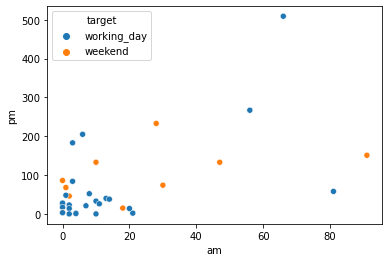

In [7]:
sns.scatterplot(data=df, x='am', y='pm', hue='target')

**Ответ:**

      "нет, это нелегко"

## 3. Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression

- Обучите логистическую регрессию, используя в качестве признаков `am` и `pm`. Учтите параметры: `random state=21`, `fit_intercept=False`.



In [9]:
logreg = LogisticRegression(random_state=21, fit_intercept=False).fit(df[['am', 'pm']], df.target)

- Сделайте предсказания в отношении каждого дня из вашего датасета и сохраните эти значения в датафрейм, в новый столбец `predict`.


In [10]:
df['predict'] = logreg.predict(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


- Сохраните датафрейм в файл в подпапку `data` под названием `am_pm.csv`.


In [12]:
df.to_csv('../data/am_pm.csv', index=False)

- Постройте еще один график, как в прошлый раз, но теперь цвет должен опираться на значения столбца `predict`

<AxesSubplot:xlabel='am', ylabel='pm'>

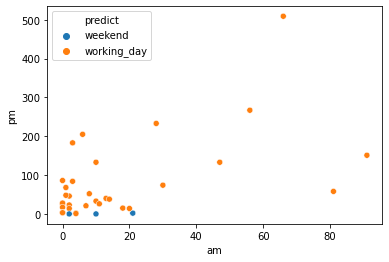

In [13]:
sns.scatterplot(data=df, x='am', y='pm', hue='predict')


- Глядя на график, как вы думаете: прогноз получился достаточно точный? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это точно" или "нет, это неточно".

**Ответ:**

       "нет, это неточно"

## 4. Оценка модели

- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [14]:
 from sklearn.metrics import accuracy_score

- Посчитайте `accuracy` прогнозов вашей модели.


In [15]:
accuracy_score(df.target, df.predict)

0.6285714285714286


- Посчитайте `accuracy` для наивного случая, когда ваш прогноз – это просто значение самого популярного класса дня для всех наблюдений.


In [16]:
df.target.value_counts()

working_day    25
weekend        10
Name: target, dtype: int64

In [17]:
sum(df.target == 'working_day') /df.shape[0]

0.7142857142857143


- Сравнив значения этих двух метрик, как вам кажется, модель сделала точный прогноз? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это точно" или "нет, это неточно".

**Ответ:**

      "нет, это неточно"